In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib import colors
import numpy as np
from mflex.model.field.utility.height_profile import f_low, f

In [3]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 2.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 2.0
zmin = 0.0
zmax = 2.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z
nf_max = 200
L = 1.0
print(xmin, ymin, zmin)
print(xmax, ymax, zmax)
print(pixelsize_x, pixelsize_y, pixelsize_z)

# Background atmosphere parameters
z0 = 0.2
deltaz = 0.02

b = 1.0

# Magnitc field parameters
z0_b = 0.2
deltaz_b = 0.02

a = 0.22
alpha = 0.25
a_low = a * (1 - np.tanh(-z0 / deltaz))
kappa = -np.log(a / a_low) / z0
kappa = 1 / z0

# Figure 1
z_arr: np.ndarray[np.float64, np.dtype[np.float64]] = (
    np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
)

f_const = np.zeros(nresol_z)
f_exp = np.zeros(nresol_z)
f_tanh = np.zeros(nresol_z)

for iz in range(0, nresol_z):
    z = z_arr[iz]
    f_const[iz] = a * (1 - np.tanh(-z0 / deltaz_b))
    f_exp[iz] = f_low(z, a_low, kappa)
    f_tanh[iz] = f(z, z0, deltaz, a, b)

0.0 0.0 0.0
2.0 2.0 2.0
0.01 0.01 0.005


In [4]:
from matplotlib import rc

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

In [5]:
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

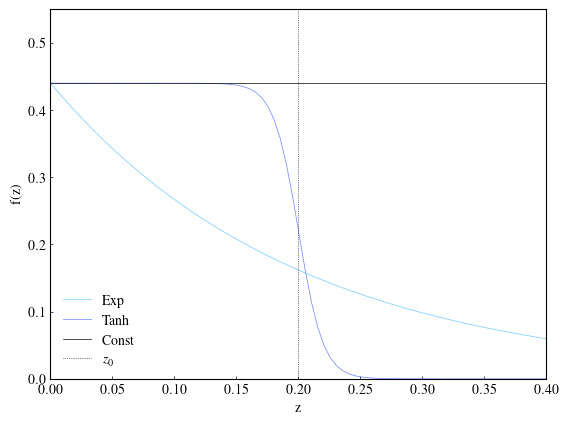

In [6]:
plt.plot(
    z_arr,
    f_exp,
    linewidth=0.5,
    color=c1,
    # linestyle="dashed",
    label="Exp",
)
plt.plot(
    z_arr,
    f_tanh,
    linewidth=0.5,
    color=c2,
    # linestyle="solid",
    label="Tanh",
)
plt.plot(
    z_arr,
    f_const,
    linewidth=0.5,
    color=c3,
    # linestyle="dotted",
    label="Const",
)
plt.axvline(x=z0_b, color="black", linestyle="dotted", linewidth=0.5, label=r"$z_0$")
plt.legend(frameon=False)
plt.xlabel("z")
plt.ylabel("f(z)")
# plt.xticks([])
# plt.yticks([])
plt.xlim([0, 2 * z0])
plt.ylim([0, 2.5 * a])
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/heightprofiles.png"
# plt.savefig(plotname, dpi=300)
plt.tick_params(direction="in", length=2, width=0.5)
plotname = "/Users/lilli/Desktop/Colortests/color_test_f.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [7]:
from mflex.simulate.simulate_boundary import dipole

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin

data_bz = np.zeros((nresol_y, nresol_x))

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y)

In [8]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#cmap=6B80FF-FFFFFF-FF3960
        (0.000, (0.420, 0.502, 1.000)),
        (0.500, (1.000, 1.000, 1.000)),
        (1.000, (1.000, 0.224, 0.376)),
    ),
)

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

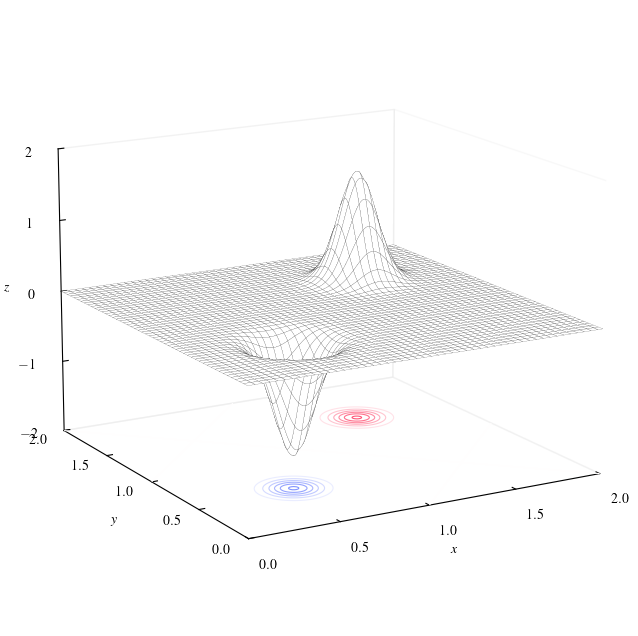

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plt.subplots_adjust()

surf = ax.plot_surface(
    y_plot,
    x_plot,
    data_bz,
    edgecolor="black",
    lw=0.1,
    cstride=4,
    rstride=4,
    color="white",
    shade=False,
)
cset = ax.contour(
    y_plot, x_plot, data_bz, 12, linewidths=0.8, zdir="z", offset=-2, cmap=cmap
)

ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

[t.set_va("bottom") for t in ax.get_yticklabels()]
[t.set_ha("right") for t in ax.get_yticklabels()]

[t.set_va("top") for t in ax.get_xticklabels()]
[t.set_ha("left") for t in ax.get_xticklabels()]

[t.set_va("top") for t in ax.get_zticklabels()]
[t.set_ha("right") for t in ax.get_zticklabels()]

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.zaxis._axinfo["tick"]["inward_factor"] = 0
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.2

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.zaxis.set_major_locator(MultipleLocator(1.0))

ax.view_init(15, -120, 0)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zlim(-2, 2)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
plotname = "/Users/lilli/Desktop/Colortests/color_test_contour1.png"
plt.savefig(plotname, dpi=300)
plt.show()

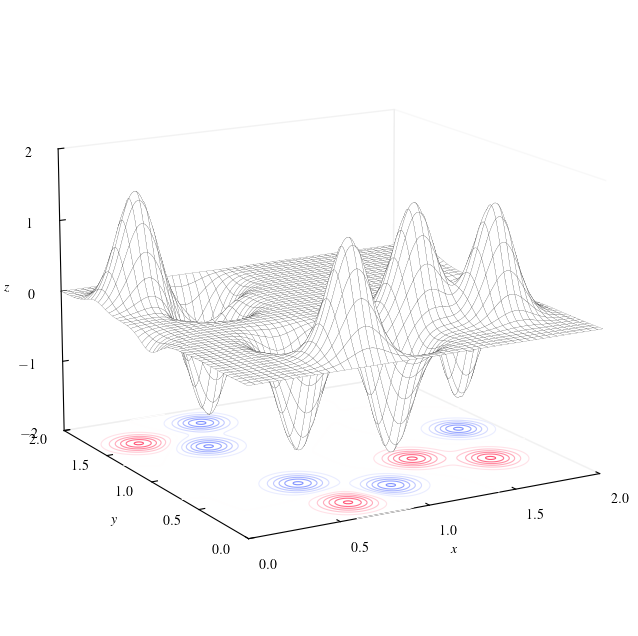

In [11]:
from mflex.simulate.simulate_boundary import dalmatian

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin

data_bz = np.zeros((nresol_y, nresol_x))

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dalmatian(x, y)


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plt.subplots_adjust()

surf = ax.plot_surface(
    y_plot,
    x_plot,
    data_bz,
    edgecolor="black",
    lw=0.1,
    cstride=4,
    rstride=4,
    color="white",
    shade=False,
)
cset = ax.contour(
    y_plot, x_plot, data_bz, 12, linewidths=0.8, zdir="z", offset=-2, cmap=cmap
)


ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

[t.set_va("bottom") for t in ax.get_yticklabels()]
[t.set_ha("right") for t in ax.get_yticklabels()]

[t.set_va("top") for t in ax.get_xticklabels()]
[t.set_ha("left") for t in ax.get_xticklabels()]

[t.set_va("top") for t in ax.get_zticklabels()]
[t.set_ha("right") for t in ax.get_zticklabels()]

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.zaxis._axinfo["tick"]["inward_factor"] = 0
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.2

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.zaxis.set_major_locator(MultipleLocator(1.0))

ax.view_init(15, -120, 0)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zlim(-2, 2)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
plotname = "/Users/lilli/Desktop/Colortests/color_test_contour2.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [12]:
from mflex.load.read_file import read_issi_analytical

data = read_issi_analytical(
    "/Users/lilli/Desktop/mflex/data/Analytic_boundary_data.sav", L
)
# BFieldvec_Seehafer = np.load('field_data_potential.npy')

data_bx = data.data_x
data_by = data.data_y
data_bz = data.data_z
nresol_x = data.nresol_x
nresol_y = data.nresol_y
nresol_z = data.nresol_z
pixelsize_x = data.pixelsize_x
pixelsize_y = data.pixelsize_y
pixelsize_z = data.pixelsize_z
nf_max = data.nf_max
xmin = data.xmin
xmax = data.xmax
ymin = data.ymin
ymax = data.ymax
zmin = data.zmin
zmax = data.zmax
z0 = data.z0

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

--------------------------------------------------
Date: Tue Sep  6 15:16:46 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 33 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
 - 1 are of type NOTICE
 - 29 are of type VARIABLE
--------------------------------------------------
Available variables:
 - b2dx1 [<class 'numpy.ndarray'>]
 - b2dy1 [<class 'numpy.ndarray'>]
 - b2dz1 [<class 'numpy.ndarray'>]
 - d2d1 [<class 'numpy.ndarray'>]
 - b2dx2 [<class 'numpy.ndarray'>]
 - b2dy2 [<class 'numpy.ndarray'>]
 - b2dz2 [<class 'numpy.ndarray'>]
 - d2d2 [<class 'numpy.ndarray'>]
 - b2dx3 [<class 'numpy.ndarray'>]
 - b2dy3 [<class 'numpy.ndarray'>]
 - b2dz3 [<class 'numpy.ndarray'>]
 - d2d3 [<class 'numpy.ndarray'>]
 - b2dx4 [<class 'numpy.ndarray'>]
 - b2dy4 [<class 'numpy.ndarray'>]
 - b2dz4 [<class '

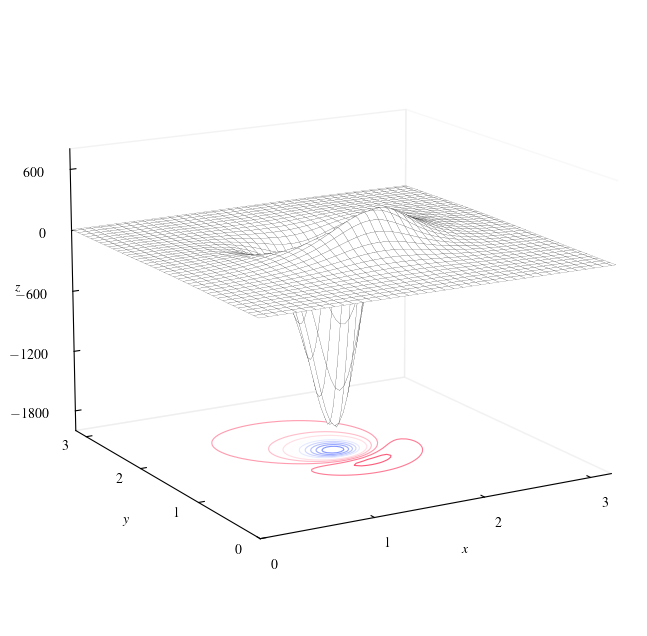

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plt.subplots_adjust()

surf = ax.plot_surface(
    y_grid,
    x_grid,
    data_bz,
    edgecolor="black",
    lw=0.1,
    cstride=2,
    rstride=2,
    color="white",
    shade=False,
)
cset = ax.contour(
    y_grid, x_grid, data_bz, 12, linewidths=0.8, zdir="z", offset=-2000, cmap=cmap
)


ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

[t.set_va("bottom") for t in ax.get_yticklabels()]
[t.set_ha("right") for t in ax.get_yticklabels()]

[t.set_va("top") for t in ax.get_xticklabels()]
[t.set_ha("left") for t in ax.get_xticklabels()]

[t.set_va("top") for t in ax.get_zticklabels()]
[t.set_ha("right") for t in ax.get_zticklabels()]

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.zaxis._axinfo["tick"]["inward_factor"] = 0
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.2

ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.zaxis.set_major_locator(MultipleLocator(600.0))

ax.view_init(15, -120, 0)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zlim(-2000, 800)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
plotname = "/Users/lilli/Desktop/Colortests/color_test_contour3.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [14]:
from mflex.load.read_file import read_issi_rmhd

data = read_issi_rmhd("/Users/lilli/Desktop/mflex/data/RMHD_boundary_data.sav", L)
# BFieldvec_Seehafer = np.load('field_data_potential.npy')

data_bx = data.data_x
data_by = data.data_y
data_bz = data.data_z
nresol_x = data.nresol_x
nresol_y = data.nresol_y
nresol_z = data.nresol_z
pixelsize_x = data.pixelsize_x
pixelsize_y = data.pixelsize_y
pixelsize_z = data.pixelsize_z
nf_max = data.nf_max
xmin = data.xmin
xmax = data.xmax
ymin = data.ymin
ymax = data.ymax
zmin = data.zmin
zmax = data.zmax
z0 = data.z0

deltaz = z0 / 10.0  # z0 at 2Mm so widht of transition region = 200km

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

--------------------------------------------------
Date: Tue Sep  6 15:18:26 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 10 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
 - 1 are of type NOTICE
 - 6 are of type VARIABLE
--------------------------------------------------
Available variables:
 - b2dx [<class 'numpy.ndarray'>]
 - b2dy [<class 'numpy.ndarray'>]
 - b2dz [<class 'numpy.ndarray'>]
 - info_unit [<class 'bytes'>]
 - info_pixel [<class 'bytes'>]
 - info_array [<class 'bytes'>]
--------------------------------------------------
b'b2d: magnetic vector (Gauss)'
b'Pixel size: 192km*192km'
b'Array example: b2dx(nx,ny)'
xmax, ymax, zmax 98.304 49.152 41.6
xmax_Mm, ymax_Mm, zmax_Mm 98.304 49.152 41.6
nresol_x, nresol_y, nresol_z 512 256 650
pixelsize_x, pixelsize_x_Mm 0.192 0.192
pixelsi

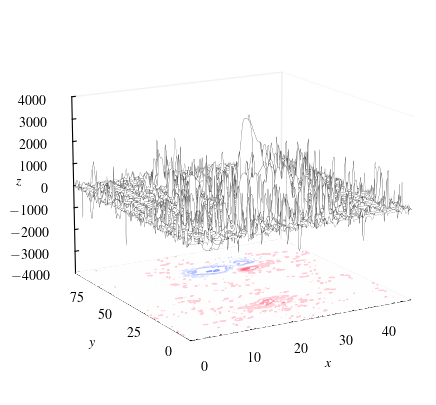

In [15]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
plt.subplots_adjust()

surf = ax.plot_surface(
    y_grid,
    x_grid,
    data_bz,
    edgecolor="black",
    lw=0.1,
    cstride=14,
    rstride=14,
    color="white",
    shade=False,
)
cset = ax.contour(
    y_grid, x_grid, data_bz, 6, linewidths=0.8, zdir="z", offset=-4000, cmap=cmap
)
ax.clabel(cset, fontsize=5, inline=True)

ax.grid(False)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

[t.set_va("bottom") for t in ax.get_yticklabels()]
[t.set_ha("right") for t in ax.get_yticklabels()]

[t.set_va("top") for t in ax.get_xticklabels()]
[t.set_ha("left") for t in ax.get_xticklabels()]

[t.set_va("top") for t in ax.get_zticklabels()]
[t.set_ha("right") for t in ax.get_zticklabels()]

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.2
ax.zaxis._axinfo["tick"]["inward_factor"] = 0
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.2

ax.xaxis.set_major_locator(MultipleLocator(10.0))
ax.yaxis.set_major_locator(MultipleLocator(25.0))
ax.zaxis.set_major_locator(MultipleLocator(1000.0))

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.view_init(15, -120, 0)

ax.set_zlim(-4000, 4000)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
plotname = "/Users/lilli/Desktop/Colortests/color_test_contour4.png"
plt.savefig(plotname, dpi=300)
plt.show()